<a href="https://colab.research.google.com/github/Milanka00/Multi-Layer-Perceptron-model-for-CKD-predicton/blob/main/MLP_for_CKD_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Installing necessary libariries and fetching the data set:

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')
from ucimlrepo import fetch_ucirepo
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
from google.colab import files

In [ ]:
# Fetch the dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# Load features and target into a single DataFrame
data = pd.DataFrame(chronic_kidney_disease.data.features, columns=chronic_kidney_disease.feature_names)
data['target'] = chronic_kidney_disease.data.targets

In [ ]:
data.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,target
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


# 2. Data preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

**2.1 Data Cleaning**

In [ ]:
# exploring unique values in the data set
for i in data.columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In categorical features there are some misstyped data other the null values

In [ ]:
# fixing misstyped data
for i in range(data.shape[0]):
    if data.iloc[i,24]=='ckd\t':
        data.iloc[i,24]='ckd'
    if data.iloc[i,19] in [' yes','\tyes']:
        data.iloc[i,19]='yes'
    if data.iloc[i,19]=='\tno':
        data.iloc[i,19]='no'
    if data.iloc[i,15]=='\t?':
        data.iloc[i,15]=np.nan
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,24]=='ckd':
        data.iloc[i,24]='yes'
    if data.iloc[i,24]=='notckd':
        data.iloc[i,24]='no'

In [ ]:
#giving meaningfull feature names for columns
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns=feature_names

In [ ]:
data.head()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,yes
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,yes
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,yes


In [ ]:
#separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

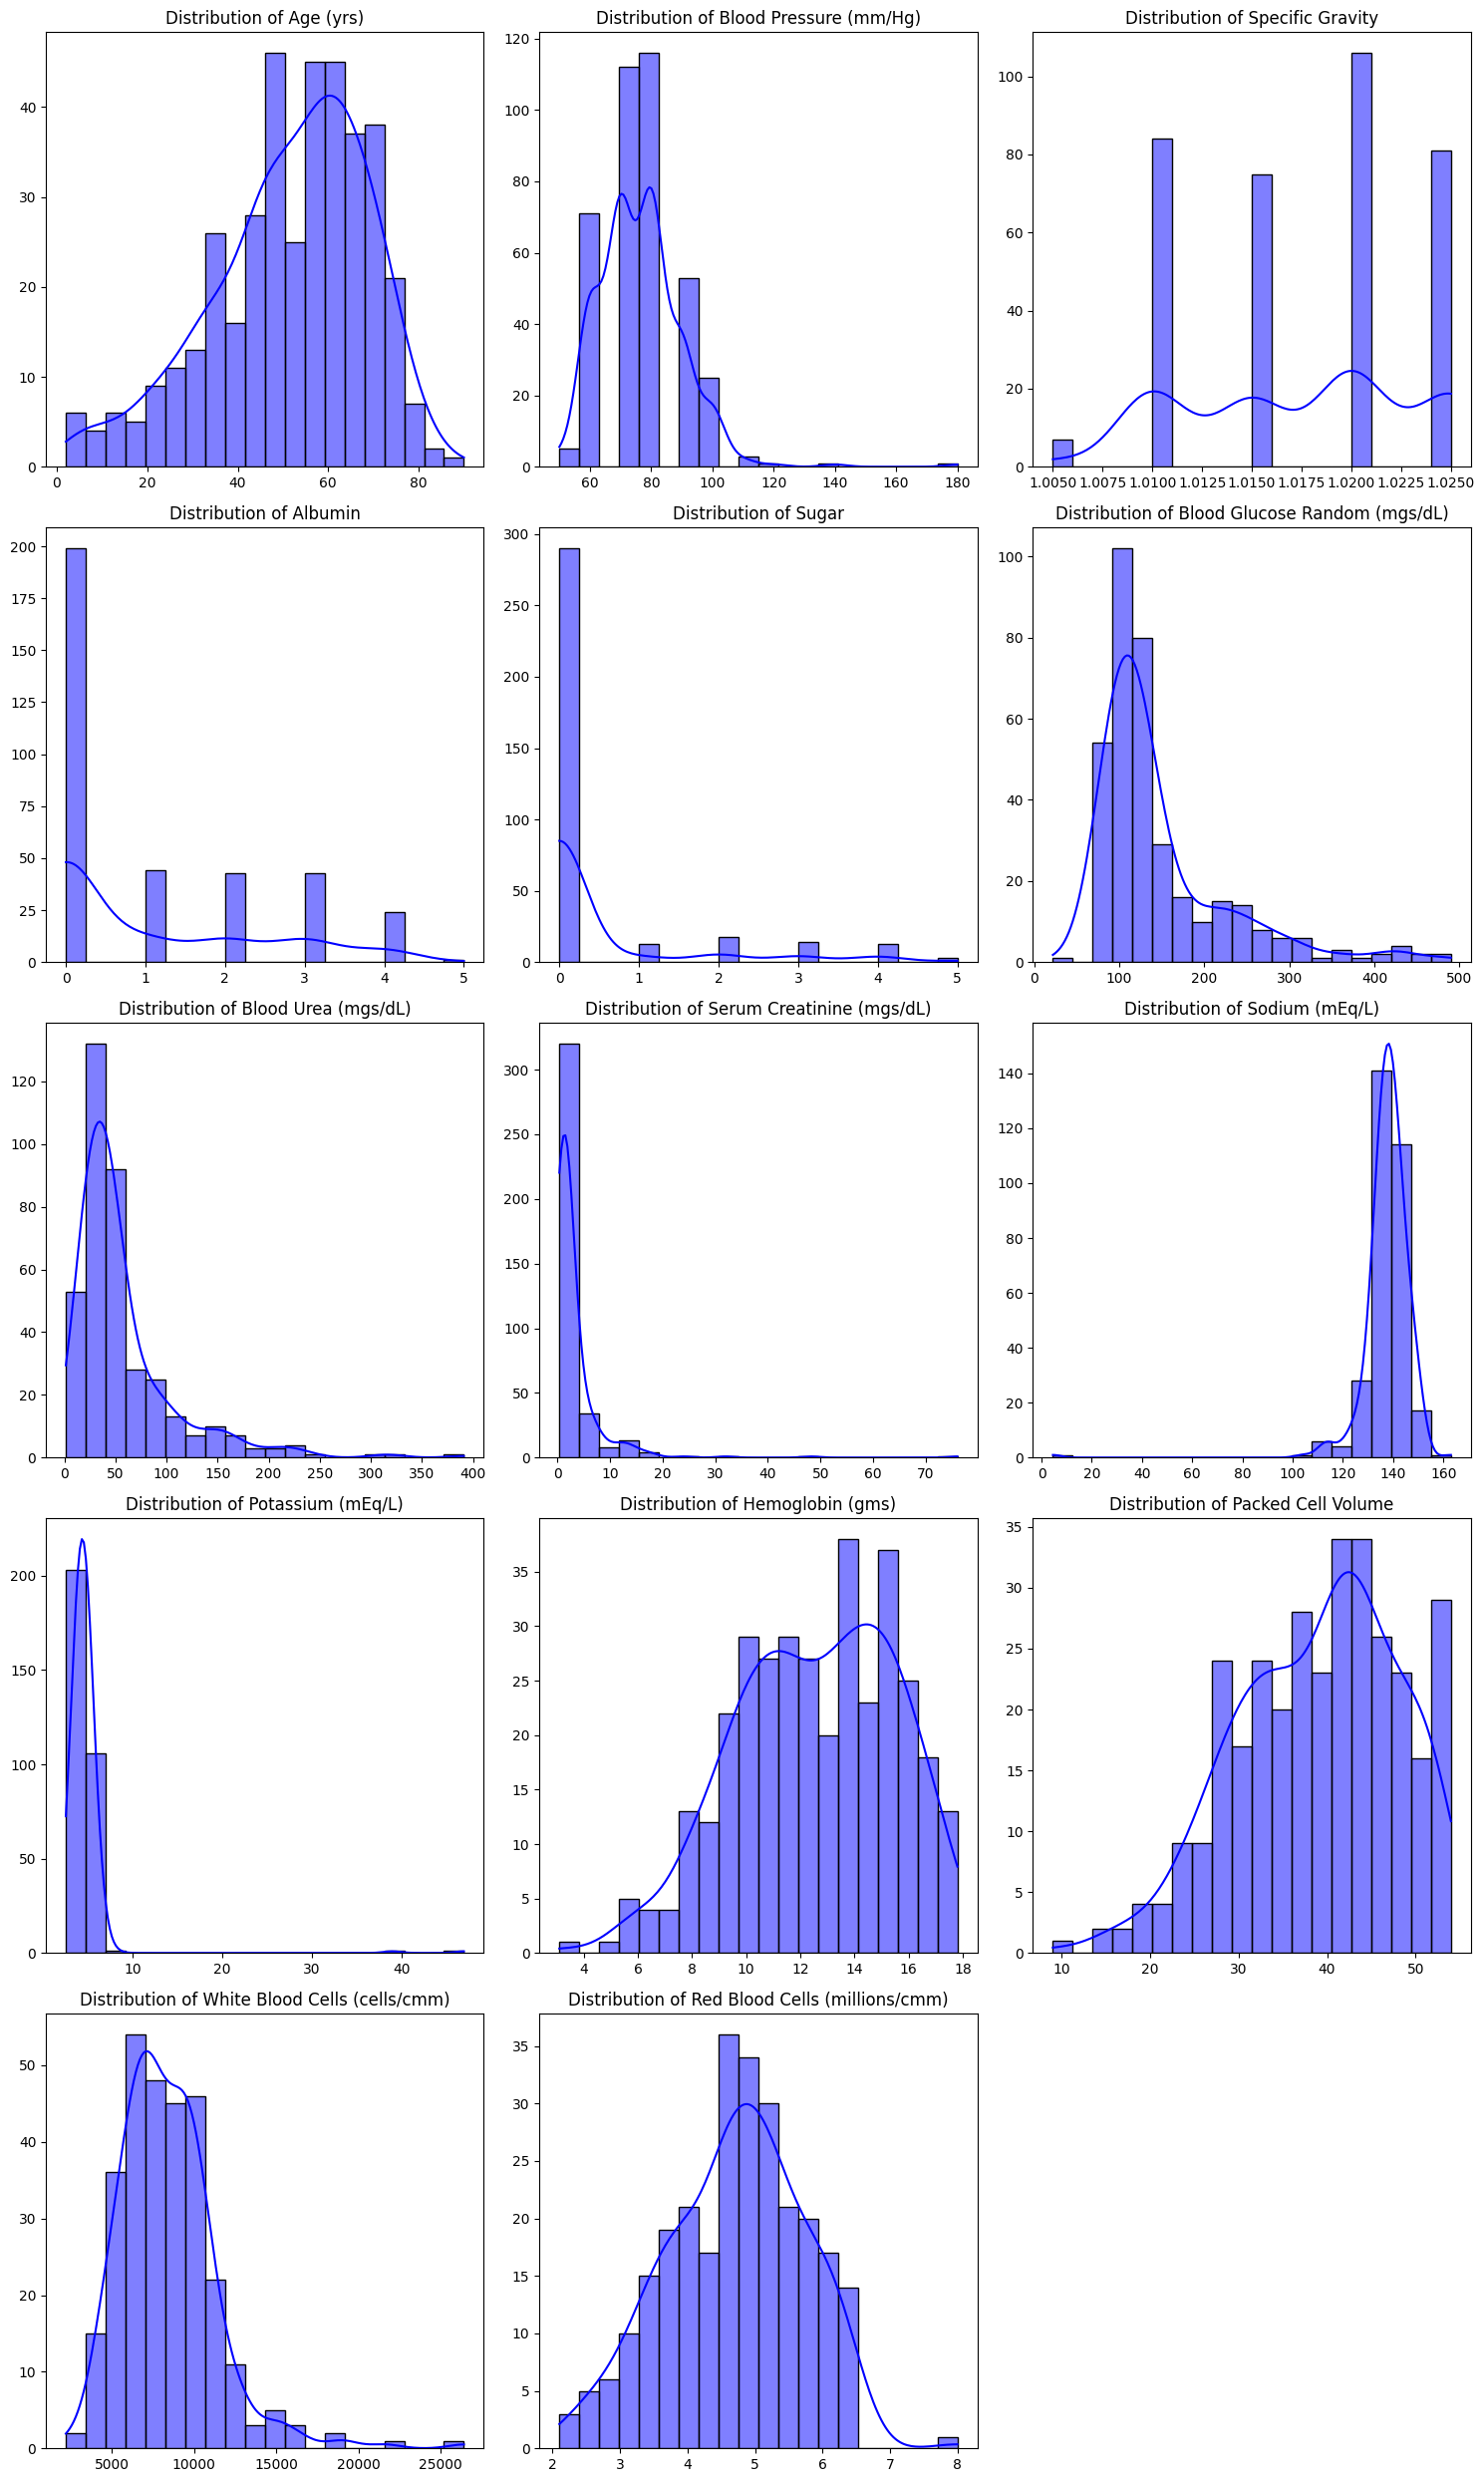

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Plot numeric columns
if len(numeric_cols) > 0:
    rows = (len(numeric_cols) + 2) // 3
    plt.figure(figsize=(15, 5 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, 3, i)
        sns.histplot(data[col], kde=True, bins=20, color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel('')
        plt.ylabel('')
    plt.tight_layout()
    # Save the figure
    plt.savefig("numeric_columns_distribution.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Download the file
    files.download("numeric_columns_distribution.png")


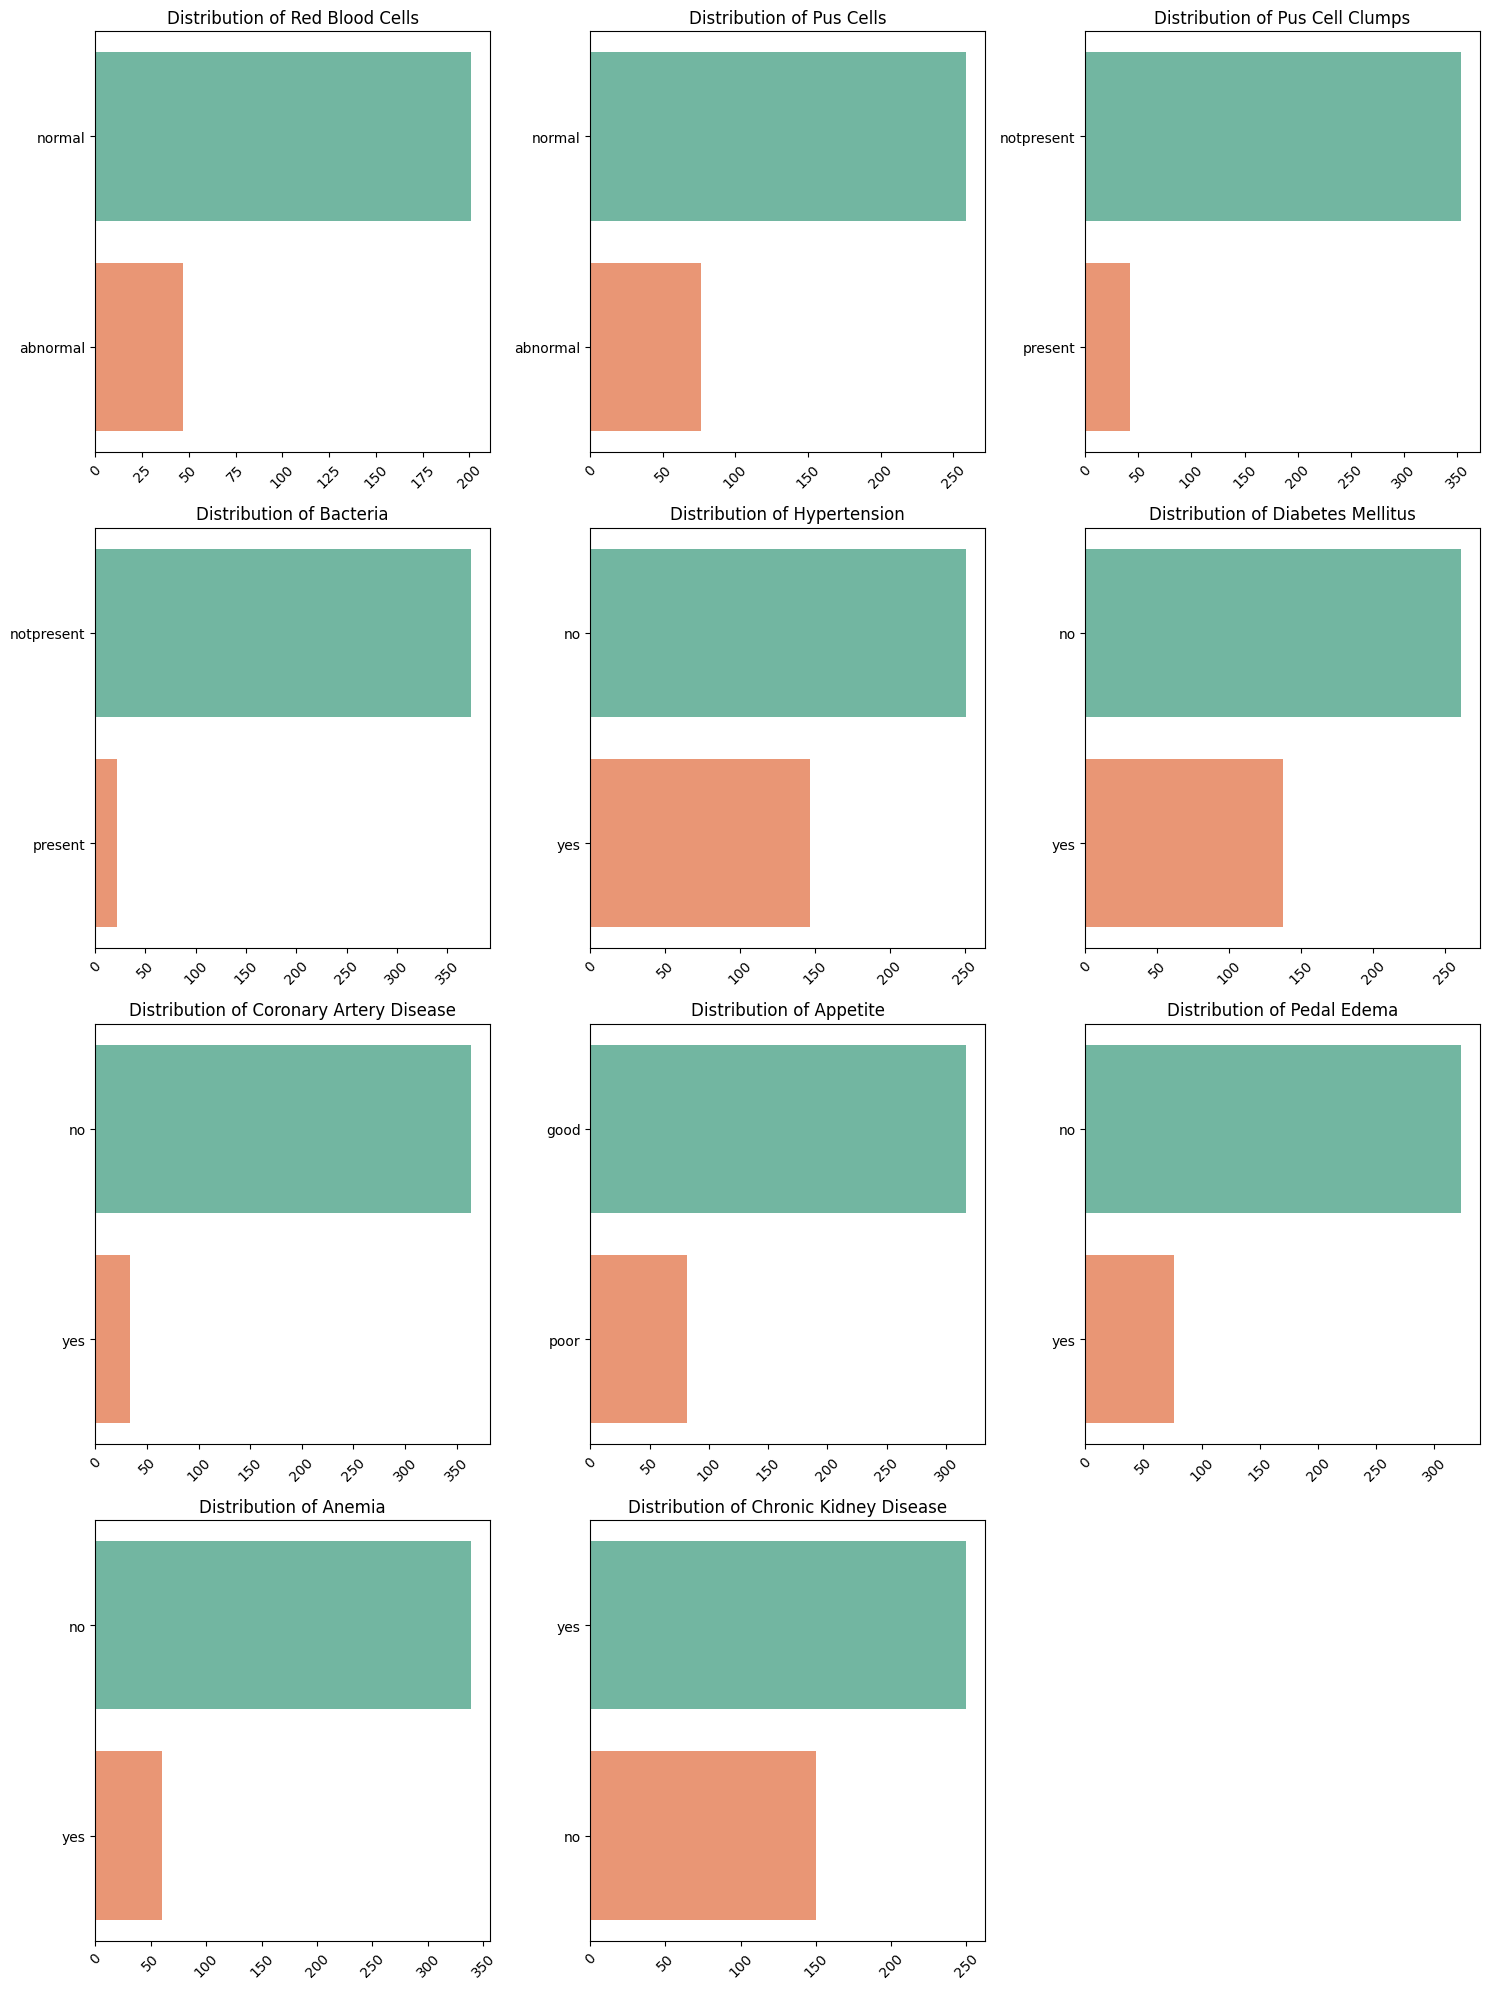

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Plot categorical columns
if len(categorical_cols) > 0:
    rows = (len(categorical_cols) + 2) // 3
    plt.figure(figsize=(15, 5 * rows))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(rows, 3, i)
        sns.countplot(data[col], palette='Set2', order=data[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks(rotation=45)
    plt.tight_layout()
    # Save the figure
    plt.savefig("categoric_columns_distribution.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Download the file
    files.download("categoric_columns_distribution.png")

**2.2 Handling missing values**

In [ ]:
print(data.isnull().sum())

Age (yrs)                           9
Blood Pressure (mm/Hg)             12
Specific Gravity                   47
Albumin                            46
Sugar                              49
Red Blood Cells                   152
Pus Cells                          65
Pus Cell Clumps                     4
Bacteria                            4
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Sodium (mEq/L)                     87
Potassium (mEq/L)                  88
Hemoglobin (gms)                   52
Packed Cell Volume                 71
White Blood Cells (cells/cmm)     106
Red Blood Cells (millions/cmm)    131
Hypertension                        2
Diabetes Mellitus                   2
Coronary Artery Disease             2
Appetite                            1
Pedal Edema                         1
Anemia                              1
Chronic Kidney Disease              0
dtype: int64


In [ ]:
# Impute numeric columns with the mean
imputer_numeric = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer_numeric.fit_transform(data[numeric_cols])

# Impute categorical/boolean columns with the most frequent value
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

In [ ]:
print(data.isnull().sum())

Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Red Blood Cells                   0
Pus Cells                         0
Pus Cell Clumps                   0
Bacteria                          0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
Hypertension                      0
Diabetes Mellitus                 0
Coronary Artery Disease           0
Appetite                          0
Pedal Edema                       0
Anemia                            0
Chronic Kidney Disease            0
dtype: int64


**2.3 Handling outliers**

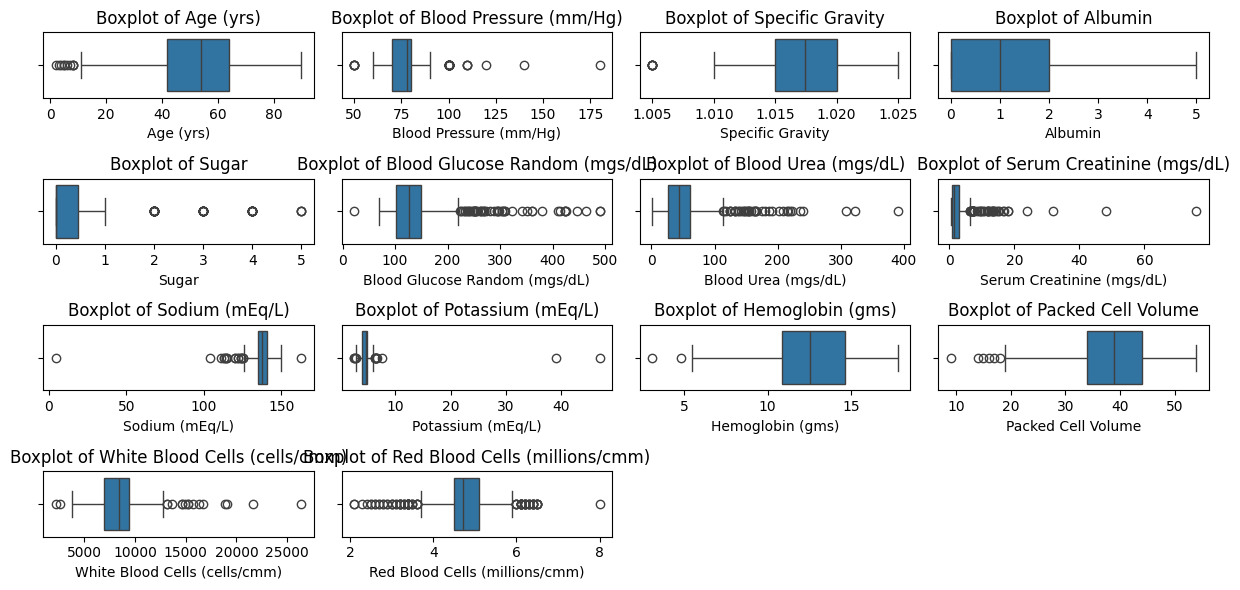

In [ ]:
# box plot visulization
plt.figure(figsize=(12, 6))

num_plots = len(numeric_cols)
num_cols = 4
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
# Save the figure
plt.savefig("outliers.png", dpi=300, bbox_inches='tight')
plt.show()

# Download the file
# files.download("outliers.png")


In [ ]:
# Detecting outliers using IQR (Interquartile Range)
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_condition = (data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)

# Count outliers per feature
outliers_count = outliers_condition.sum()
print("Outliers count per feature:")
print(outliers_count)

Outliers count per feature:
Age (yrs)                         10
Blood Pressure (mm/Hg)            36
Specific Gravity                   7
Albumin                            0
Sugar                             48
Blood Glucose Random (mgs/dL)     53
Blood Urea (mgs/dL)               41
Serum Creatinine (mgs/dL)         44
Sodium (mEq/L)                    18
Potassium (mEq/L)                 14
Hemoglobin (gms)                   2
Packed Cell Volume                 6
White Blood Cells (cells/cmm)     17
Red Blood Cells (millions/cmm)    75
dtype: int64


In [ ]:
# Replace outliers with the lower or upper bound values
for col in numeric_cols:
    data[col] = np.where(data[col] < lower_bound[col], lower_bound[col], data[col])
    data[col] = np.where(data[col] > upper_bound[col], upper_bound[col], data[col])

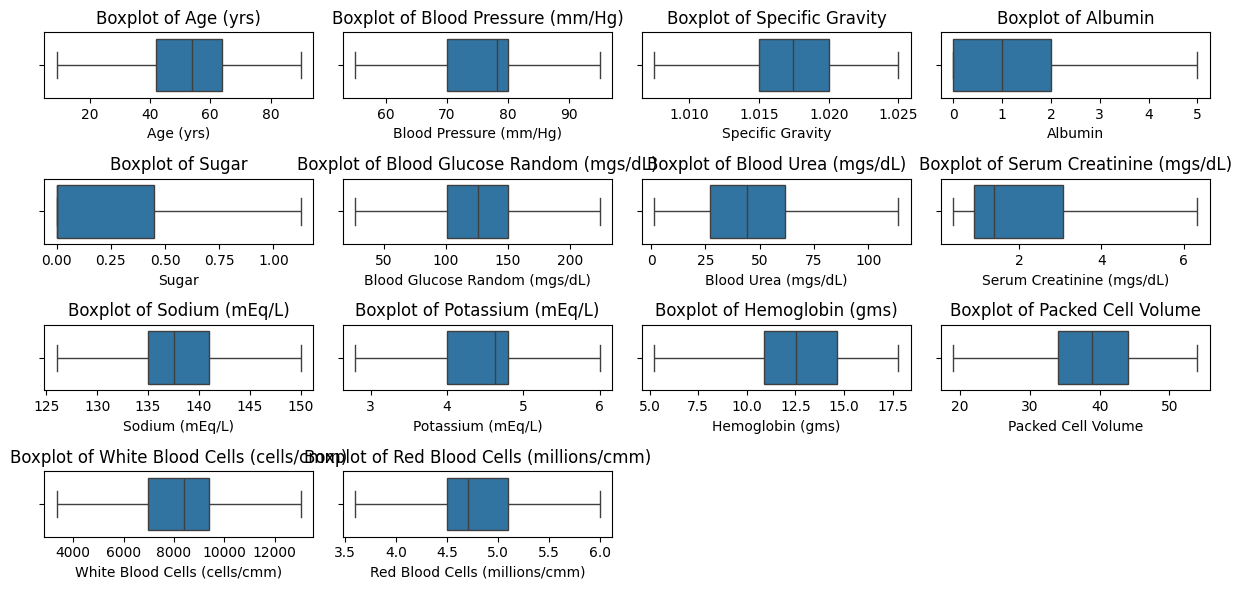

In [ ]:
# Visualize the distributions of numeric columns again
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

**2.4 Encoding categorical data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       400 non-null    float64
 1   Blood Pressure (mm/Hg)          400 non-null    float64
 2   Specific Gravity                400 non-null    float64
 3   Albumin                         400 non-null    float64
 4   Sugar                           400 non-null    float64
 5   Red Blood Cells                 400 non-null    object 
 6   Pus Cells                       400 non-null    object 
 7   Pus Cell Clumps                 400 non-null    object 
 8   Bacteria                        400 non-null    object 
 9   Blood Glucose Random (mgs/dL)   400 non-null    float64
 10  Blood Urea (mgs/dL)             400 non-null    float64
 11  Serum Creatinine (mgs/dL)       400 non-null    float64
 12  Sodium (mEq/L)                  400 

In [ ]:
binary_cols = [
    'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
    'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
    'Appetite', 'Pedal Edema', 'Anemia', 'Chronic Kidney Disease'
]

# Apply label encoding to binary columns in the original data
label_encoder = LabelEncoder()
for col in binary_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Check the transformed DataFrame
print(data.head())


   Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin     Sugar  \
0       48.0                    80.0            1.0200      1.0  0.000000   
1        9.0                    55.0            1.0200      4.0  0.000000   
2       62.0                    80.0            1.0100      2.0  1.125356   
3       48.0                    70.0            1.0075      4.0  0.000000   
4       51.0                    80.0            1.0100      2.0  0.000000   

   Red Blood Cells  Pus Cells  Pus Cell Clumps  Bacteria  \
0                1          1                0         0   
1                1          1                0         0   
2                1          1                0         0   
3                1          0                1         0   
4                1          1                0         0   

   Blood Glucose Random (mgs/dL)  ...  Packed Cell Volume  \
0                     121.000000  ...                44.0   
1                     148.036517  ...                3

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       400 non-null    float64
 1   Blood Pressure (mm/Hg)          400 non-null    float64
 2   Specific Gravity                400 non-null    float64
 3   Albumin                         400 non-null    float64
 4   Sugar                           400 non-null    float64
 5   Red Blood Cells                 400 non-null    int64  
 6   Pus Cells                       400 non-null    int64  
 7   Pus Cell Clumps                 400 non-null    int64  
 8   Bacteria                        400 non-null    int64  
 9   Blood Glucose Random (mgs/dL)   400 non-null    float64
 10  Blood Urea (mgs/dL)             400 non-null    float64
 11  Serum Creatinine (mgs/dL)       400 non-null    float64
 12  Sodium (mEq/L)                  400 

**Separating the features and target**

In [ ]:
target_column = 'Chronic Kidney Disease'

# Separate features (X) and target (y)
X = data.drop(columns=[target_column])  # Features (all columns except the target)
Y = data[target_column]

In [ ]:
# reshaped for future use
X_array = X.to_numpy()
X = X_array.reshape(400, 24)

**Scaling the features**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**train, test split**

In [ ]:
# Convert target variable to a numpy array
Y = np.array(Y).reshape(-1, 1)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3,stratify=Y, random_state=42)

# Generic class for MLP model

In [ ]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

class NeuralNetwork:
    def __init__(self, n_inputs, hidden_layer_sizes=[3]):

        #Initializes the feedforward neural network.

        self.input_size = n_inputs
        self.output_size = 1  # binary classification
        self.num_hidden_layers = len(hidden_layer_sizes)
        self.layer_sizes = [self.input_size] + hidden_layer_sizes + [self.output_size]

        # Initialize weights (W) and biases (B) for all layers
        self.weights = {}
        self.biases = {}
        for i in range(self.num_hidden_layers + 1):
            self.weights[i + 1] = np.random.randn(self.layer_sizes[i], self.layer_sizes[i + 1])
            self.biases[i + 1] = np.zeros((1, self.layer_sizes[i + 1]))

    def sigmoid(self, z):

       # Activation function: Sigmoid.

        return 1.0 / (1.0 + np.exp(-z))

    def forward_pass(self, inputs):

        self.activations = {}
        self.layer_outputs = {}
        self.layer_outputs[0] = inputs.reshape(1, -1)

        for i in range(self.num_hidden_layers + 1):
            # Compute linear combination for current layer
            self.activations[i + 1] = np.matmul(self.layer_outputs[i], self.weights[i + 1]) + self.biases[i + 1]
            # Apply sigmoid activation
            self.layer_outputs[i + 1] = self.sigmoid(self.activations[i + 1])

        return self.layer_outputs[self.num_hidden_layers + 1]

    def sigmoid_gradient(self, output):

        return output * (1 - output)

    def compute_gradients(self, inputs, true_output):

        self.forward_pass(inputs)

        self.grad_weights = {}
        self.grad_biases = {}
        self.grad_activations = {}
        self.grad_layer_outputs = {}

        # Compute gradient for the last layer (output layer)
        last_layer = self.num_hidden_layers + 1
        self.grad_activations[last_layer] = self.layer_outputs[last_layer] - true_output

        # Backpropagate through layers
        for layer in range(last_layer, 0, -1):
            # Gradients for weights and biases
            self.grad_weights[layer] = np.matmul(self.layer_outputs[layer - 1].T, self.grad_activations[layer])
            self.grad_biases[layer] = self.grad_activations[layer]
            # Propagate error to the previous layer
            if layer > 1:
                self.grad_layer_outputs[layer - 1] = np.matmul(self.grad_activations[layer], self.weights[layer].T)
                self.grad_activations[layer - 1] = np.multiply(self.grad_layer_outputs[layer - 1],
                                                               self.sigmoid_gradient(self.layer_outputs[layer - 1]))

    def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True, display_loss=False):

        # Reinitialize weights and biases if required
        if initialize:
            for i in range(self.num_hidden_layers + 1):
                self.weights[i + 1] = np.random.randn(self.layer_sizes[i], self.layer_sizes[i + 1])
                self.biases[i + 1] = np.zeros((1, self.layer_sizes[i + 1]))

        if display_loss:
            loss = {}

        for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            # Initialize cumulative gradients
            cumulative_grad_weights = {i + 1: np.zeros_like(self.weights[i + 1]) for i in range(self.num_hidden_layers + 1)}
            cumulative_grad_biases = {i + 1: np.zeros_like(self.biases[i + 1]) for i in range(self.num_hidden_layers + 1)}

            for x, y in zip(X, Y):
                self.compute_gradients(x, y)

                for i in range(self.num_hidden_layers + 1):
                    cumulative_grad_weights[i + 1] += self.grad_weights[i + 1]
                    cumulative_grad_biases[i + 1] += self.grad_biases[i + 1]

            # Update weights and biases using gradient descent
            m = X.shape[0]  # Number of training samples
            for i in range(self.num_hidden_layers + 1):
                self.weights[i + 1] -= learning_rate * cumulative_grad_weights[i + 1] / m
                self.biases[i + 1] -= learning_rate * cumulative_grad_biases[i + 1] / m

            # Compute loss
            if display_loss:
                Y_pred = self.predict(X)
                loss[epoch] = mean_squared_error(Y_pred, Y)

        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()

    def predict(self, X):

        predictions = []
        for x in X:
            predictions.append(self.forward_pass(x))
        return np.array(predictions).squeeze()


In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_train, Y_train, X_test, Y_test, threshold=0.5):

    # Predict on training data
    Y_pred_train = model.predict(X_train)
    Y_pred_binarised_train = (Y_pred_train >= threshold).astype("int").ravel()

    # Predict on testing data
    Y_pred_test = model.predict(X_test)
    Y_pred_binarised_test = (Y_pred_test >= threshold).astype("int").ravel()

    # Calculate accuracies
    accuracy_train = accuracy_score(Y_train, Y_pred_binarised_train)
    accuracy_test = accuracy_score(Y_test, Y_pred_binarised_test)

    # Return results
    return {
        "training_accuracy": accuracy_train,
        "testing_accuracy": accuracy_test,
        "train_predictions": Y_pred_binarised_train,
        "testing_predictions": Y_pred_binarised_test,
    }

  0%|          | 0/2500 [00:00<?, ?epoch/s]

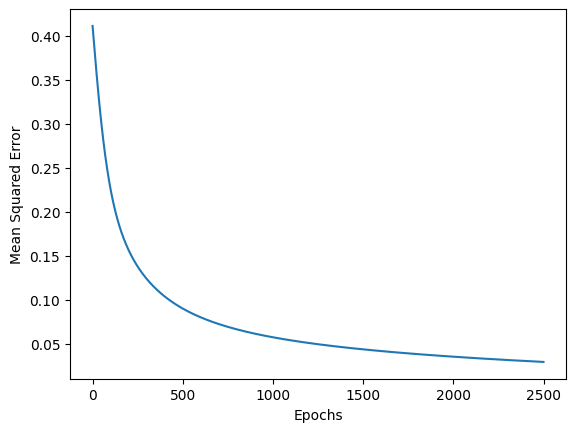

Training Accuracy: 0.975
Testing Accuracy: 0.9583333333333334


In [ ]:
# Instantiate the model with 24 inputs and 1 hidden layer with 14 neurons
ffsnn = NeuralNetwork(24, [14])

# Train the model
ffsnn.fit(X_train, Y_train, epochs=2500, learning_rate=0.01, display_loss=True)

results = evaluate_model(ffsnn, X_train, Y_train, X_test, Y_test)
print(f"Training Accuracy: {results['training_accuracy']}")
print(f"Testing Accuracy: {results['testing_accuracy']}")

Confusion Matrix (Training):


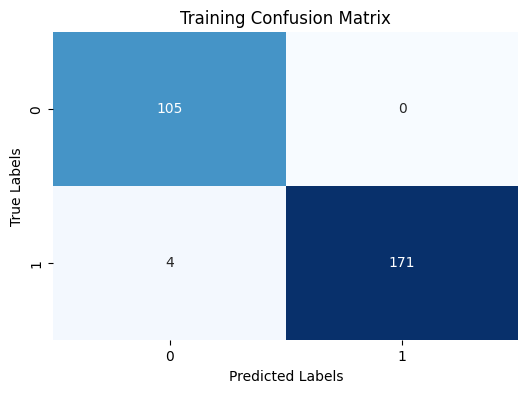

Confusion Matrix (Testing):


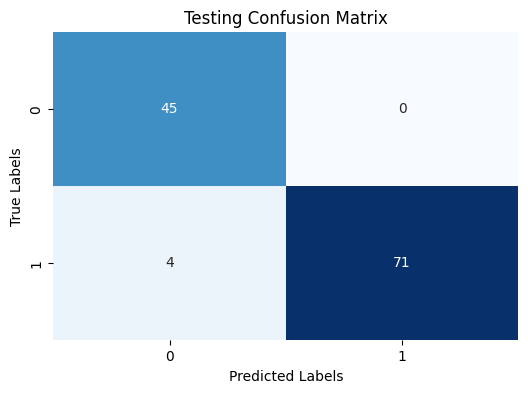

In [ ]:
# Calculate confusion matrices
conf_matrix_train = confusion_matrix(Y_train, results['train_predictions'])
conf_matrix_test = confusion_matrix(Y_test, results['testing_predictions'])

# Plot confusion matrices
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Plot for training and validation
print("Confusion Matrix (Training):")
plot_confusion_matrix(conf_matrix_train, "Training Confusion Matrix")

print("Confusion Matrix (Testing):")
plot_confusion_matrix(conf_matrix_test, "Testing Confusion Matrix")

# Variations

**Affect of number of hidden layers**

  0%|          | 0/2500 [00:00<?, ?epoch/s]

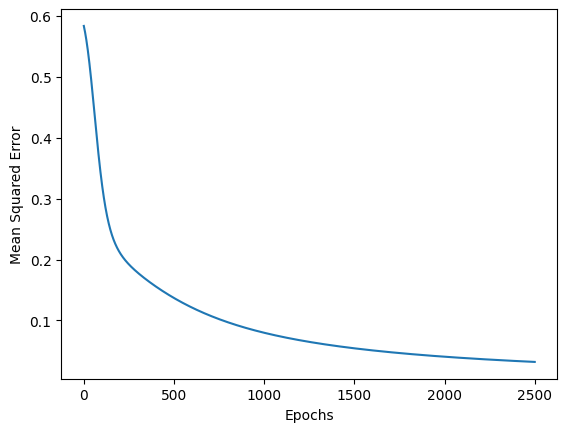

Training Accuracy: 0.9821428571428571
Testing Accuracy: 0.95


In [ ]:
# Instantiate the model with 24 inputs and 2 hidden layer with 14,12 neurons
ffsnn1 = NeuralNetwork(24, [14,12])

# Train the model
ffsnn1.fit(X_train, Y_train, epochs=2500, learning_rate=0.01, display_loss=True)

results = evaluate_model(ffsnn1, X_train, Y_train, X_test, Y_test)
print(f"Training Accuracy: {results['training_accuracy']}")
print(f"Testing Accuracy: {results['testing_accuracy']}")

  0%|          | 0/2500 [00:00<?, ?epoch/s]

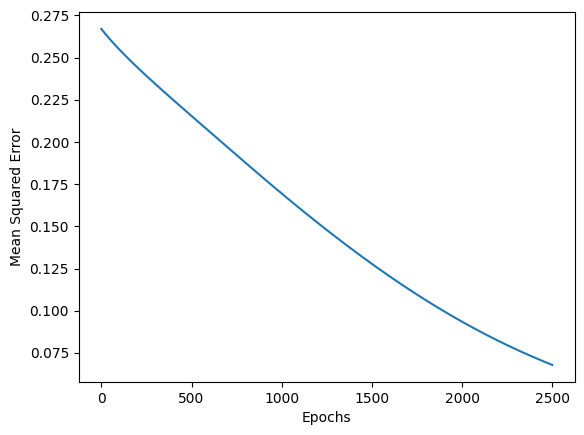

Training Accuracy: 0.9642857142857143
Testing Accuracy: 0.9416666666666667


In [ ]:
# Instantiate the model with 24 inputs and 3 hidden layer with 14,12,10 neurons
ffsnn2 = NeuralNetwork(24, [14,12,10])

# Train the model
ffsnn2.fit(X_train, Y_train, epochs=2500, learning_rate=0.01, display_loss=True)

results = evaluate_model(ffsnn2, X_train, Y_train, X_test, Y_test)
print(f"Training Accuracy: {results['training_accuracy']}")
print(f"Testing Accuracy: {results['testing_accuracy']}")

**Affect of standardizing the input attributes**

In [ ]:
#when X is not scaled
# Split data into training and testing sets (80% training, 20% testing)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.3,stratify=Y, random_state=42)

  0%|          | 0/2500 [00:00<?, ?epoch/s]

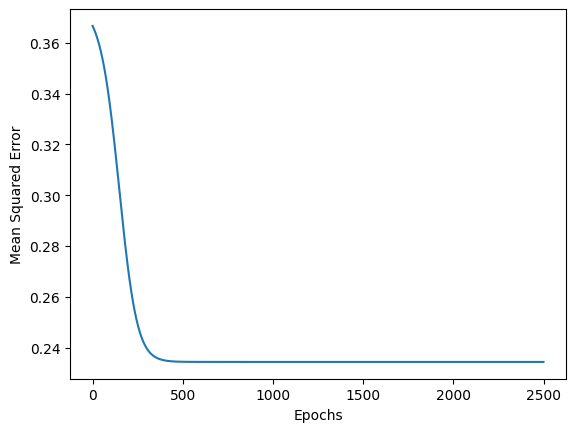

Training Accuracy: 0.625
Testing Accuracy: 0.625


In [ ]:
# Instantiate the model with 24 inputs and 1 hidden layer with 12 neurons
ffsnnNotScaled = NeuralNetwork(24, [12])

# Train the model
ffsnnNotScaled.fit(X_train1, Y_train1, epochs=2500, learning_rate=0.01, display_loss=True)

results = evaluate_model(ffsnnNotScaled, X_train1, Y_train1, X_test1, Y_test1)
print(f"Training Accuracy: {results['training_accuracy']}")
print(f"Testing Accuracy: {results['testing_accuracy']}")